> # # **PROYECTO: RECOMENDACIÓN DE PRODUCTOS BANCARIOS A CLIENTES**

![](http://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Santander_Argentina_Logo.png/1200px-Santander_Argentina_Logo.png)


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Tratamiento de datos
import numpy as np                    
import pandas as pd
!pip install prettytable
from prettytable import PrettyTable
import warnings
# Gráficos
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt # El modulo Pyplot de Matplotlib
!pip install seaborn
import seaborn as sns                 # Importar Seaborn
#from sklearn.preprocessing import scale
!pip install scikit-learn
from sklearn import preprocessing  # Import label encoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split #para separar en train y test
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
# Modelos de Clasificacion:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# MULTINOMIAL NAVES BAYES
from sklearn.naive_bayes import MultinomialNB
# LIGHT GBM
!pip install lightgbm
import lightgbm as lgb
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# XGBOOST
!pip install xgboost
import xgboost 
from xgboost import XGBClassifier
from xgboost import plot_importance
# Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('¡Librerías importadas con éxito!')

/kaggle/input/santander-product-recommendation/test_ver2.csv.zip
/kaggle/input/santander-product-recommendation/sample_submission.csv.zip
/kaggle/input/santander-product-recommendation/train_ver2.csv.zip
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.3 MB/s eta 0:00:0000:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 45.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 23.7 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 3.6 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.

In [ ]:
#Lectura de dataset (archivo csv)
clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)
# Muestra de las diez primeras filas del dataset
clientes.head(10)

/tmp/ipykernel_14/190704024.py:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


> # **Sección 4: DATA WRANGLING**
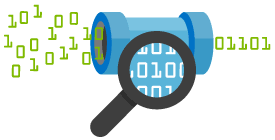


El data wrangling es el conjunto de técnicas y procesos utilizados para manipular, limpiar y unificar conjuntos de datos complejos y desordenados con el fin de facilitar su acceso, análisis y modelado. Este proceso implica la transformación de datos crudos en un formato más adecuado para su uso, lo que incluye la conversión y el mapeo de los datos, la eliminación de datos redundantes o inconsistentes, la normalización de los datos y la corrección de errores. El objetivo final del data wrangling es producir un conjunto de datos limpios y coherentes que puedan ser fácilmente analizados y modelados para obtener información útil y valiosa.

**4.1 IDENTIFICACIÓN DE VALORES DUPLICADOS**

In [ ]:
#Un valor duplicado es aquel en el que todos los valores de al menos una fila son idénticos a todos los valores de otra fila. Una comparación de valores duplicados depende de lo que aparece en la celda, no del valor subyacente almacenado en la celda.
# check all columns values 
clientes.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Length: 13647309, dtype: bool

In [ ]:
#Count duplicated
print(f'Cantidad de filas duplicadas en todo el conjunto de datos {clientes.duplicated().sum()} \n')
#count non duplicated
print(f'Cantidad de filas NO DUPLICADAS {(~clientes.duplicated()).sum()} ')

Cantidad de filas duplicadas en todo el conjunto de datos 0 

Cantidad de filas NO DUPLICADAS 13647309 


*El Dataset no tiene filas duplicadas*

**4.2 IDENTIFICACIÓN Y LIMPIEZA DE VALORES NULOS**

> **Revisión de valores nulos**

In [ ]:
#Conteo de nulos
missing_data = clientes.isnull()
missing_data.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Calculamos el total y el porcentaje de valores nulos por columna
total_nulos = clientes.isnull().sum()
porcentaje_nulos = round(clientes.isnull().mean() * 100, 2)

# Creamos un DataFrame con la información anterior
datos_faltantes = pd.concat([total_nulos, porcentaje_nulos], axis=1, keys=['Total', 'Porcentaje'])

# Filtramos las columnas con valores nulos y las mostramos en orden descendente
columnas_con_nulos = datos_faltantes[datos_faltantes['Total'] > 0].sort_values('Total', ascending=False)
print(f"Existen {columnas_con_nulos.shape[0]} columnas con valores nulos en el dataset:")
print(columnas_con_nulos)

Existen 22 columnas con valores nulos en el dataset:
                          Total  Porcentaje
conyuemp               13645501       99.99
ult_fec_cli_1t         13622516       99.82
renta                   2794375       20.48
segmento                 189368        1.39
canal_entrada            186126        1.36
indrel_1mes              149781        1.10
tiprel_1mes              149781        1.10
nomprov                   93591        0.69
cod_prov                  93591        0.69
sexo                      27804        0.20
tipodom                   27735        0.20
indfall                   27734        0.20
ind_actividad_cliente     27734        0.20
ind_empleado              27734        0.20
pais_residencia           27734        0.20
indext                    27734        0.20
indresi                   27734        0.20
indrel                    27734        0.20
ind_nuevo                 27734        0.20
fecha_alta                27734        0.20
ind_nomina_ult1        

> **Visualización de datos nulos**

In [ ]:
#Missingno es una libreria de python donde ayuda a visualizar datos nulos en dataframe en pandas
#install library
!pip install missingno
import missingno as msno

**BAR PLOT**

Verifica en todas las columnas la cantidad de valores no nulos, y alli podemos identificar cuales son las barras que no llegan al tope , indicando cuales son las columnas que tiene datos nulos y su cantidad

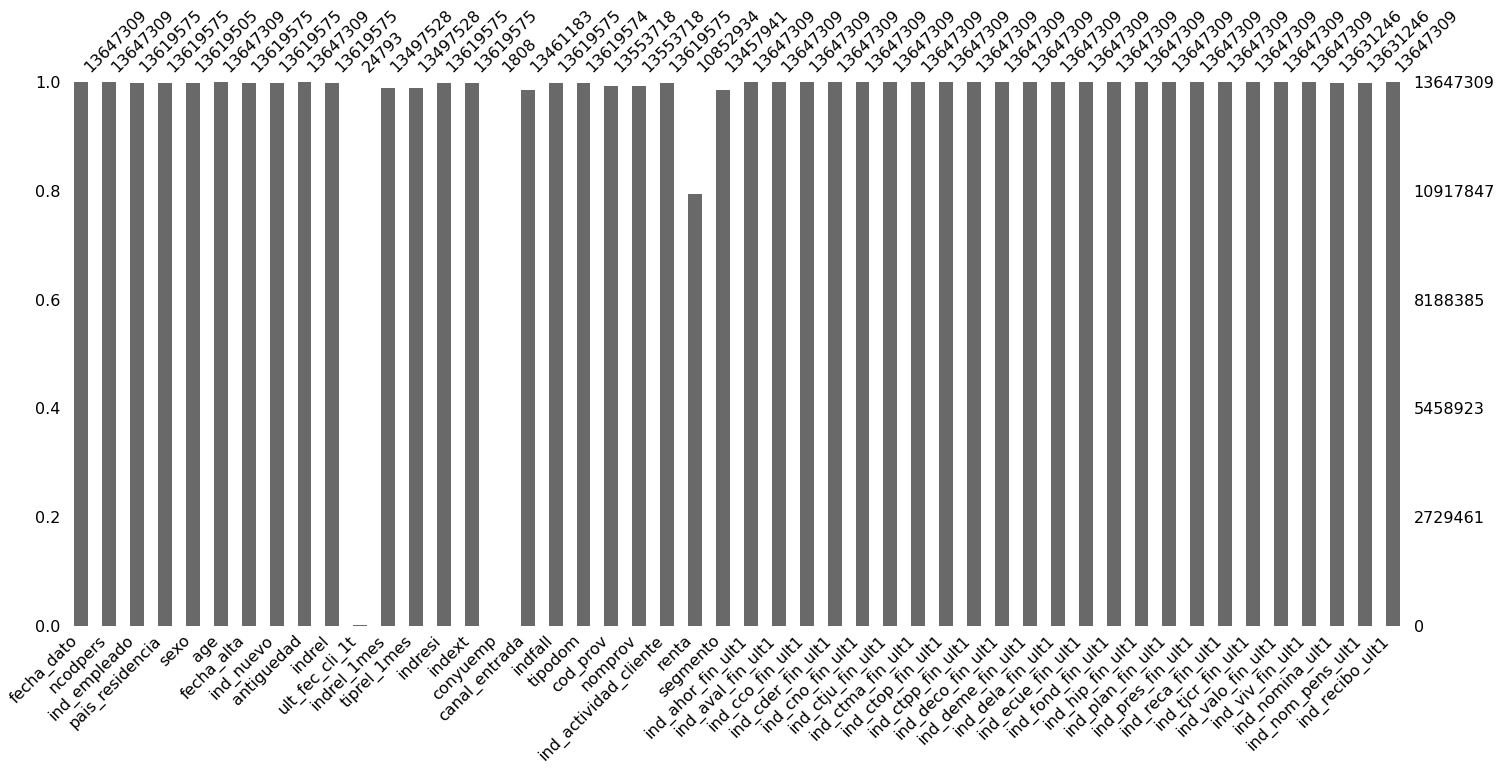

In [ ]:
#Create bar plot 
msno.bar(clientes);

**MATRIX**

La matriz muestra las columnas del conjunto de datos y su distribución en líneas verticales. Los espacios en blanco indican valores nulos en esas columnas. Al observar la matriz, se puede tener una idea aproximada de la ubicación de los valores nulos en el conjunto de datos.

<AxesSubplot:>

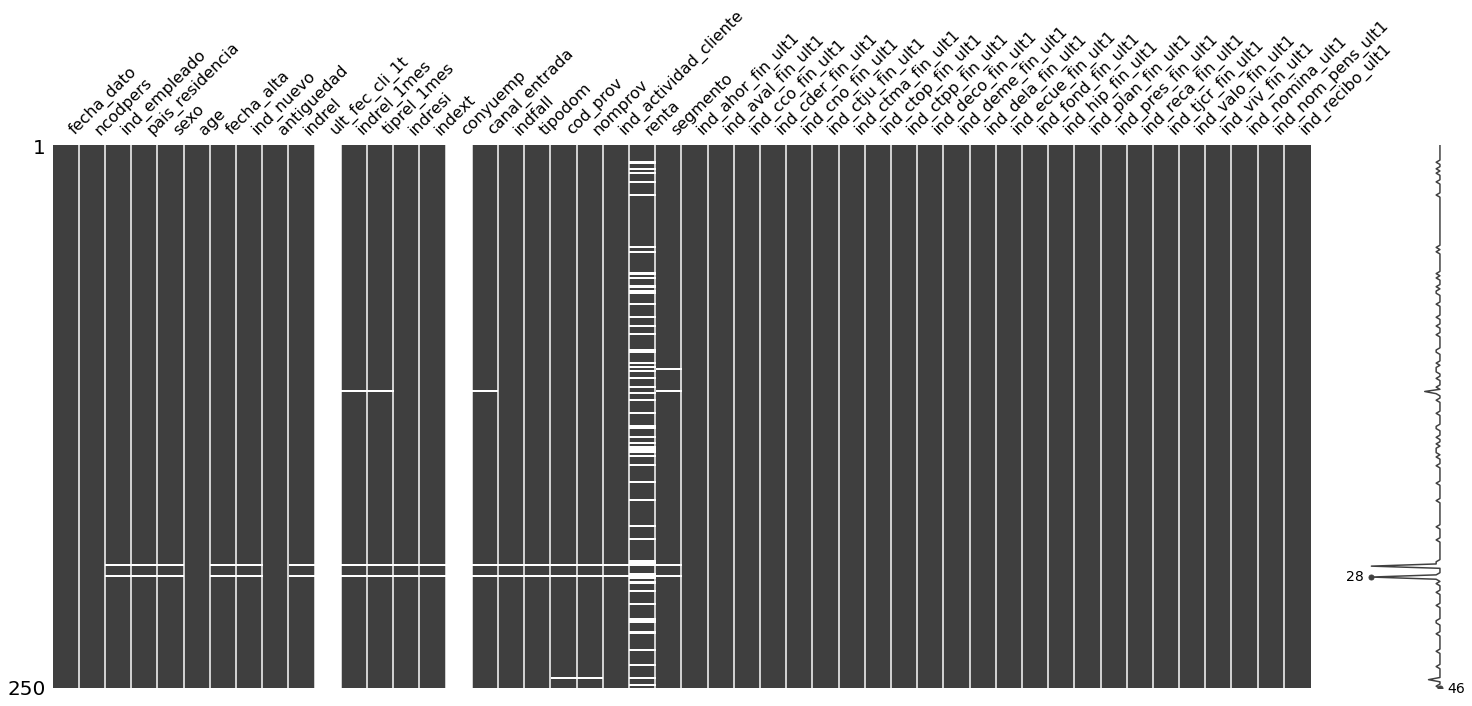

In [ ]:
#Create matrix plot
msno.matrix(clientes.sample(250))

**OBSERVACIÓN:**

La mayoría de las columnas parecen estar completamente pobladas, aunque hay algunas con datos faltantes. El minigráfico de la derecha muestra un patrón general de integridad de los datos, y señala las filas con la mayor y menor cantidad de valores faltantes en el conjunto de datos. Esto puede ayudar a identificar patrones y posibles causas de los valores faltantes en las filas correspondientes..

**HEAT MAP**

La representación gráfica de HEAT MAP se utiliza para visualizar la correlación de nulidad entre las columnas que tienen datos nulos. Esta herramienta es útil para verificar si las columnas con datos nulos son las mismas filas en las que los valores son nulos.
Además, el mapa de calor muestra la fuerza de la correlación entre las columnas con datos nulos. La correlación de nulidad mide qué tan fuerte la presencia o ausencia de una variable afecta la presencia de otra. En otras palabras, si dos columnas están altamente correlacionadas, cuando una de ellas tiene un valor nulo, la otra columna también tendrá un valor nulo.
Por lo tanto, el mapa de calor es una herramienta útil para identificar patrones de nulidad en los datos y ayudar a los analistas a tomar decisiones informadas sobre cómo manejar los datos nulos.

<AxesSubplot:>

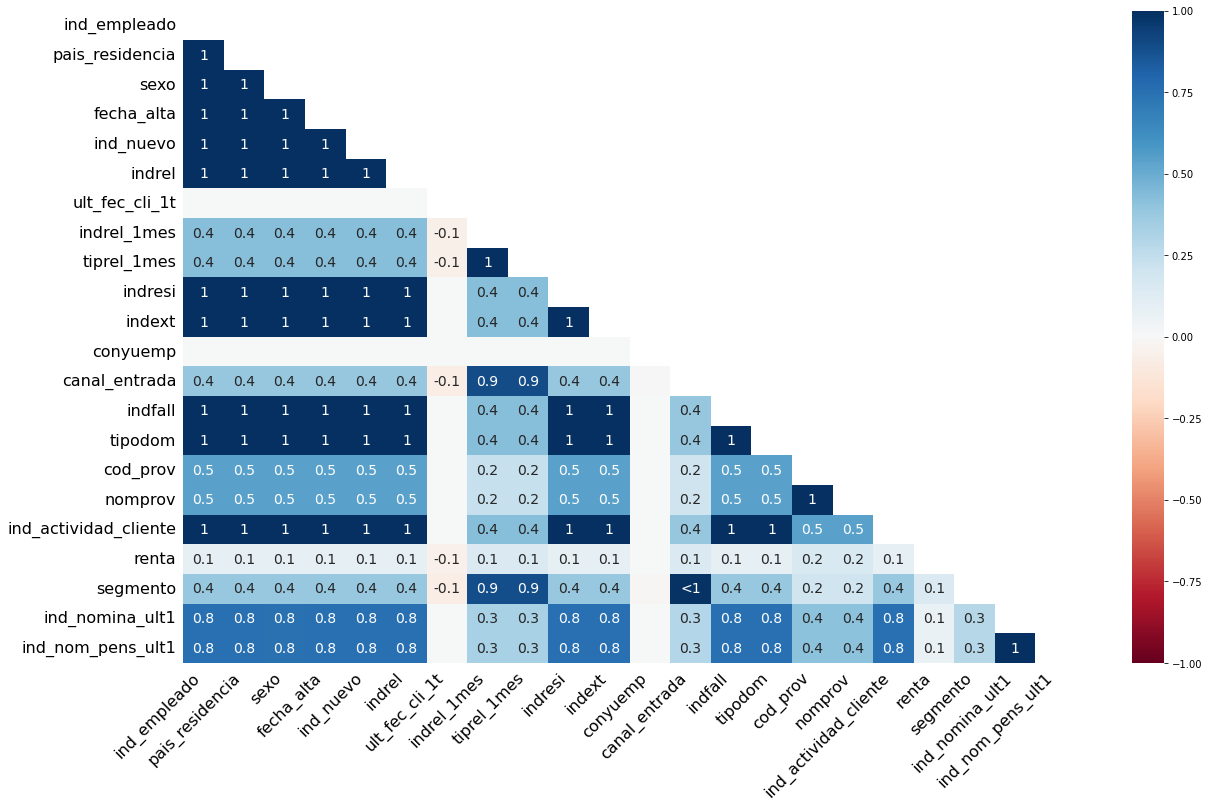

In [ ]:
msno.heatmap(clientes)

**OBSERVACIÓN:**

La correlación de nulidad es una medida útil para verificar si la presencia o ausencia de una variable afecta la presencia de otra. Esta medida varía desde -1 (si una variable aparece, la otra definitivamente no lo hace) hasta 0 (si las variables que aparecen o no aparecen no tienen efecto entre sí) hasta 1 (si una variable aparece, la otra definitivamente también lo hace).
Para visualizar la correlación de nulidad, se pueden tomar las columnas que tienen datos nulos y crear un mapa de calor (heat map). En este mapa, las variables que siempre están llenas o siempre vacías se eliminan silenciosamente de la visualización. Por ejemplo, las columnas de fecha_dato, ncodpers, age, y antiguedad que están completamente llenas no se incluyen.
Las entradas en el mapa de calor que están marcadas con un valor menor a 1 indican una correlación que está cerca de ser exactamente negativa, pero no lo es del todo perfectamente. Esto puede apuntar a una pequeña cantidad de registros en el conjunto de datos que son erróneos y requieren atención especial. Por ejemplo, en este conjunto de datos, la correlación entre segmento y canal_entrada es <1, lo que indica que, contrariamente a nuestras expectativas, hay algunos registros que tienen uno u otro, pero no ambos.
En resumen, el mapa de calor de correlación de nulidad es una herramienta útil para detectar patrones en los datos y evaluar la calidad de los mismos.

> **Descripción de columas con valores nulos**

**Seleccionamos variables categóricas y numéricas**

In [ ]:
cat_columns = clientes.select_dtypes(include='object').columns
numeric_columns = clientes.select_dtypes(include=np.number).columns

In [ ]:
cat_columns

Index(['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age',
       'fecha_alta', 'antiguedad', 'ult_fec_cli_1t', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada',
       'indfall', 'nomprov', 'segmento'],
      dtype='object')

In [ ]:
numeric_columns

Index(['ncodpers', 'ind_nuevo', 'indrel', 'tipodom', 'cod_prov',
       'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

**Chequeamos la dimensionalidad de las variables categóricas**

In [ ]:
cat_info = []
# Loop por columnas categóricas
for col in cat_columns:
    n_unique = clientes[col].nunique()
    unique_vals = clientes[col].unique()
    info = (col, n_unique, unique_vals)
    cat_info.append(info)

# Crear dataframe a partir de la lista de tuplas
cat_info_df = pd.DataFrame(cat_info, columns=['feature', 'cantidad', 'valores'])

# Imprimir dataframe
print(cat_info_df)

            feature  cantidad   
0        fecha_dato        17  \
1      ind_empleado         5   
2   pais_residencia       118   
3              sexo         2   
4               age       235   
5        fecha_alta      6756   
6        antiguedad       507   
7    ult_fec_cli_1t       223   
8       indrel_1mes        13   
9       tiprel_1mes         5   
10          indresi         2   
11           indext         2   
12         conyuemp         2   
13    canal_entrada       162   
14          indfall         2   
15          nomprov        52   
16         segmento         3   

                                              valores  
0   [2015-01-28, 2015-02-28, 2015-03-28, 2015-04-2...  
1                                [N, nan, A, B, F, S]  
2   [ES, nan, CA, CH, CL, IE, AT, NL, FR, GB, DE, ...  
3                                         [H, V, nan]  
4   [ 35,  23,  22,  24,  65,  28,  25,  26,  53, ...  
5   [2015-01-12, 2012-08-10, nan, 2012-08-16, 2012...  
6   [      6,

**Chequeamos variables numéricas con nulos**

In [ ]:
# columna indrel_1mes
clientes.indrel_1mes.value_counts(dropna=False)

1.0    7277607
1.0    4017746
1      2195328
NaN     149781
3.0       1804
3.0       1409
3         1137
P          874
2          483
2.0        479
2.0        355
4.0        143
4.0         93
4           70
Name: indrel_1mes, dtype: int64

In [ ]:
# columna cod_prov
clientes.cod_prov.value_counts().head()

28.0    4409600
8.0     1275219
46.0     682304
41.0     605164
15.0     429322
Name: cod_prov, dtype: int64

In [ ]:
# columnba tipodom
clientes.tipodom.value_counts(dropna=False)

1.0    13619574
NaN       27735
Name: tipodom, dtype: int64

In [ ]:
# columna ind_actividad_cliente
clientes.ind_actividad_cliente.value_counts(dropna=False)

0.0    7384390
1.0    6235185
NaN      27734
Name: ind_actividad_cliente, dtype: int64

In [ ]:
# columna indrel
clientes.indrel.value_counts(dropna=False)

1.0     13594782
NaN        27734
99.0       24793
Name: indrel, dtype: int64

In [ ]:
# columna ind_nuevo
clientes.ind_nuevo.value_counts(dropna=False)

0.0    12808368
1.0      811207
NaN       27734
Name: ind_nuevo, dtype: int64

In [ ]:
# columna fecha_alta
clientes.fecha_alta.value_counts().head()

2014-07-28    57389
2014-10-03    54287
2014-08-04    45746
2013-10-14    40804
2013-08-03    33414
Name: fecha_alta, dtype: int64

In [ ]:
# columna ind_nomina_ult1
clientes.ind_nomina_ult1.value_counts(dropna=False)

0.0    12885285
1.0      745961
NaN       16063
Name: ind_nomina_ult1, dtype: int64

In [ ]:
# columna ind_nom_pens_ult1
clientes.ind_nom_pens_ult1.value_counts(dropna=False)

0.0    12821161
1.0      810085
NaN       16063
Name: ind_nom_pens_ult1, dtype: int64

> **Enfoque a seguir para la limpieza de nulos:**

1. **conyuemp y ult_fec_cli_1t**: aproximadamente el 99% de los valores de estas columnas son nulos, por lo que se decide removerlas.Además, como el objetivo del proyecto es predecir si un cliente adquirirá un nuevo producto bancario en junio de 2016, no tendría sentido realizar predicciones para clientes que abandonaron el banco antes de esa fecha.
2. **renta:** Cantidad de valores nulos - 2794375. Se reemplazan los valores nulos (que representan el 20,48%) por el ingreso promedio de los clientes
3. **segmento:** Cantidad de valores nulos - 189368. Se reemplazan los valores nulos (que representan el 1,39%) por el segmento mayoritario (Particulares).
4. **canal_entrada:** Cantidad de valores nulos - 186126. Se reemplazan los valores nulos (que representan el 1,36%) por el canal mayoritario (KHE).
5. **indrel_1mes:** Cantidad de valores nulos - 149781. Se reemplazan los valores nulos (que representan el 1,1%) por el valor 0.
6. **tiprel_1mes:** Cantidad de valores nulos - 149781. Se reemplazan los valores nulos (que representan el 1,1%) por el tipo de relación del cliente al inicio del mes predominante (I - inactivo).
7. **nomprov:** Cantidad de valores nulos - 93591. Se reemplazan los valores nulos (que representan el 0,69%) por la provincia de residencia mayoritaria (MADRID).
8. **cod_prov:** Cantidad de valores nulos - 93591 (que representan el 0,69%). La información ya está disponible en la columna nomprov, por lo que se decide removerla del dataset.
9. **sexo:** Cantidad de valores nulos - 27804. Se reemplazan los valores nulos (que representan el 0,20%) por el género predominante (V).
10. **tipodom:** Cantidad de valores nulos - 27735 (representan el 0,20%). Todos los valores no nulos tienen el código 1 que corresponde a dirección principal, no es una columna usada por lo que se decide removerla del dataset. 
11. **indfall:** Cantidad de valores nulos - 27734. Se reemplazan los valores nulos (que representan el 0,20%) por el índice mayoritario de deceso (N - No).
12. **indext:** Cantidad de valores nulos - 27734. Se reemplazan los valores nulos (que representan el 0,20%) por el índice mayoritario de extranjero (N - No). 
13. **ind_actividad_cliente:** Cantidad de valores nulos - 27734. Se reemplazan los valores nulos (que representan el 0.20%) por el índice de actividad predominante (0.0 - cliente inactivo).
14. **indresi:** Cantidad de valores nulos - 27734. Se reemplazan los valores nulos (que representan el 0.20%) por el índice de residencia mayoritario (S - Sí).
15. **indrel:** Cantidad de valores nulos - 27734. Se reemplazan los valores nulos (que representan el 0,20%) por el índice mayoritario (1.0 - Primero/principal).
16. **ind_nuevo:** Cantidad de valores nulos - 27734. Se reemplazan los valores nulos (que representan el 0,20%) por el índice mayoritario (0.0 - Cliente antiguo resgistrado hace mas de 6 meses).
17. **fecha_alta:** Cantidad de valores nulos - 27734. Se reemplazan los valores nulos (que representan el 0,20%) por la fecha de dato mínimo.
18. **pais_residencia:** Cantidad de valores nulos - 27734. Se reemplazan los valores nulos (que representan el 0,20%) por el país de residencia mayoritario (ES - España).
19. **ind_empleado:** Cantidad de valores nulos - 27734. Se reemplazan los valores nulos (que representan el 0,20%) por el índice de empleado mayoritario (N - No empleado).
20. **ind_nomina_ult1 y ind_nom_pens_ult1:** Cantidad de valores nulos - 16063. Se reemplazan los valores nulos (que representan el 0,12%) por el estado de compra del producto mayoritario (0 - no adquirido)

> **Limpieza de nulos**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoANHyQoQEO-vvL7KOkisWsVBvhBIAmDbydWuBeLk7Oc3v1TENE-h79JZQ_BZuT3CmY7Q&usqp=CAU)

In [ ]:
# columnas conyuemp y ult_fec_cli_1t
clientes.drop(['conyuemp', 'ult_fec_cli_1t'],axis=1, inplace=True)
# columna renta
clientes.loc[clientes["renta"].isnull(),"renta"] = np.nanmedian(clientes.renta)
# columna segmento
clientes.loc[clientes["segmento"].isnull(),"segmento"] = '02 - PARTICULARES'
# columna canal_entrada
clientes.loc[clientes["canal_entrada"].isnull(),"canal_entrada"] = 'KHE'
# columna indrel_1mes
clientes["indrel_1mes"] = clientes["indrel_1mes"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
# columna tiprel_1mes
clientes.loc[clientes["tiprel_1mes"].isnull(),"tiprel_1mes"] = 'I'
# columna nomprov
clientes.loc[clientes["nomprov"].isnull(),"nomprov"] = 'MADRID'
# columna cod_prov
clientes.drop(['cod_prov'],axis=1, inplace=True)
# columna sexo
clientes.loc[clientes["sexo"].isnull(),"sexo"] = 'V'
# columna tipodom
clientes.drop(['tipodom'],axis=1, inplace=True)
#columna indfall
clientes["indfall"].fillna('N', inplace=True)
# columna indext
clientes["indext"].fillna('N', inplace=True)
# columna ind_actividad_cliente
clientes["ind_actividad_cliente"].fillna(0.0, inplace=True)
# columna indresi
clientes["indresi"].fillna('S', inplace=True)
# columna indrel
clientes["indrel"].fillna(1.0, inplace=True)
# columna ind_nuevo
clientes["ind_nuevo"].fillna(0.0, inplace=True)
# columna fecha_alta
cust_ids = clientes[clientes.fecha_alta.isnull()]['ncodpers']
tmp = clientes[clientes.ncodpers.isin(cust_ids)].groupby(['ncodpers', 'fecha_dato']).size().to_frame()
tmp.reset_index(level=[0,1], inplace=True)
tmp.columns=['ncodpers', 'fecha_dato','Count']
tmp.drop(columns='Count', inplace=True)
tmp = tmp.join(tmp.groupby('ncodpers')['fecha_dato'].agg(['min', 'max']), on='ncodpers')
tmp.drop(['fecha_dato'], axis = 1, inplace=True)
tmp.drop_duplicates(keep='first', inplace=True)
tmp.rename(index=str, columns={"ncodpers": "ncodpers", "min": "Min_fecha_dato", "max":"Max_fecha_dato"}, inplace=True)
# columna fecha_alta
clientes = clientes.merge(tmp, on='ncodpers', how = 'outer')
clientes.loc[clientes.fecha_alta.isnull(), 'fecha_alta'] = clientes.Min_fecha_dato
clientes.drop(columns=['Min_fecha_dato', 'Max_fecha_dato'], inplace=True)
# columna pais_residencia
clientes.loc[clientes["pais_residencia"].isnull(),"pais_residencia"] = 'ES'
# columna ind_empleado
clientes.loc[clientes["ind_empleado"].isnull(),"ind_empleado"] = "N"
# columnas ind_nomina_ult1 y ind_nom_pens_ult1
clientes["ind_nomina_ult1"].fillna(0.0, inplace=True)
clientes["ind_nom_pens_ult1"].fillna(0.0, inplace=True)

In [ ]:
#se exporta a csv el dataset limpio
clientes.to_csv('clientes_limpio.csv',header=True,index=False)


**4.3 TRANSFORMACIÓN DE LOS DATOS**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQE1caNP74mF0LDe06F6GamNL0kF_YSLtvk2w&usqp=CAU)

In [ ]:
clientes_limpio=pd.read_csv('clientes_limpio.csv', header=0)
clientes_limpio.info()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  indrel_1mes            int64  
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  nomprov                object 
 17  ind_actividad_cliente  float64
 18  renta                  float64
 19  segmento               object 
 20  ind_ahor_fin_ult1      int64  
 21  ind_aval_fin_ult1      int64  
 22  ind_cco_fin_ult1

In [ ]:
clientes_limpio.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

**TRANSFORMAMOS LA COLUMNA AGE**

In [ ]:
#columna age
clientes_limpio['age'] = pd.to_numeric(clientes_limpio.age, errors='coerce')
grupo_edad = clientes_limpio['age'].value_counts()
len_unique = len(grupo_edad)
print("Número de valores únicos de edad de los clientes : ",len_unique)
print("Mayor edad de los clientes : ", np.max(clientes_limpio.age))
print("Menor edad de los clientes : ", np.min(clientes_limpio.age))
print("Edad promedio de los clientes : ", np.mean(clientes_limpio.age))

Número de valores únicos de edad de los clientes :  120
Mayor edad de los clientes :  164.0
Menor edad de los clientes :  2.0
Edad promedio de los clientes :  40.18146491355274


**Debido a la presencia de valores atípicos en la columna de edad del conjunto de datos, se procederá a eliminar aquellos registros en los que la edad sea menor a 15 o mayor a 100, ya que no es recomendable ofrecer paquetes de productos a individuos fuera de ese rango de edad.**

In [ ]:
#columna age
clientes_limpio = clientes_limpio[((clientes_limpio["age"] > 15) & (clientes_limpio["age"] < 100))]

**Después de explorar y visualizar los datos, se encontró que ningún cliente ha adoptado los productos (ind_ahor_fin_ult1 e ind_aval_fin_ult1). Por lo tanto, eliminamos estas columnas de nuestro conjunto de datos ya que tienen pocas posibilidades de ser recomendadas entre los 7 mejores productos..**

In [ ]:
#columnas ind_ahor_fin_ult1 e ind_aval_fin_ult1
clientes_limpio.drop(columns=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],inplace = True)

**TRANSFORMAMOS LAS COLUMNAS fecha_dato, fecha_alta y antiguedad**

In [ ]:
#variable fecha_dato
clientes_limpio['fecha_dato'] = clientes_limpio['fecha_dato'].replace('-','',regex=True).str.strip(' ,')
clientes_limpio['fecha_dato'] = clientes_limpio['fecha_dato'].astype("float64")
#variable fecha_alta
clientes_limpio['fecha_alta'] = clientes_limpio['fecha_alta'].replace('-','',regex=True).str.strip(' ,')
clientes_limpio['fecha_alta'] = clientes_limpio['fecha_alta'].astype("float64")
#variable antiguedad
clientes_limpio["antiguedad"] = pd.to_numeric(clientes_limpio["antiguedad"],errors = 'coerce')

**TRANSFORMAMOS COLUMNAS CATEGÓRICAS A NUMÉRICAS CON LABELENCODER** 

In [ ]:
cat_columns = clientes_limpio.select_dtypes(include='object').columns

In [ ]:
cat_columns

Index(['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_1mes', 'indresi',
       'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento'],
      dtype='object')

In [ ]:
lista = []
#loop por columnas categóricas
for col in cat_columns:
  info = (col, clientes_limpio[col].nunique(), clientes_limpio[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature', 'cantidad', 'valores'])

,feature,cantidad,valores
0,ind_empleado,5,"[N, A, B, F, S]"
1,pais_residencia,118,"[ES, CA, US, CH, CL, IE, AT, NL, FR, GB, DE, D..."
2,sexo,2,"[H, V]"
3,tiprel_1mes,5,"[A, I, P, R, N]"
4,indresi,2,"[S, N]"
5,indext,2,"[N, S]"
6,canal_entrada,162,"[KHL, KHE, KHD, KFA, KFC, KAT, KAZ, RED, KHC, ..."
7,indfall,2,"[N, S]"
8,nomprov,52,"[MALAGA, CIUDAD REAL, ZARAGOZA, TOLEDO, LEON, ..."
9,segmento,3,"[02 - PARTICULARES, 03 - UNIVERSITARIO, 01 - TOP]"


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#generacion del encoder 
le = OrdinalEncoder(handle_unknown='use_encoded_value' , #use cuando tenes valores desconocidos 
                    unknown_value=-1) # asignacion a valores desconocidos 

# generacion de numeros por cada categorico 
le.fit(clientes_limpio[cat_columns])

#transformacion de las categoricas en train dataset
clientes_limpio[cat_columns] = le.transform(clientes_limpio[cat_columns])

> **4.4 LIMPIEZA DE OUTLIERS**
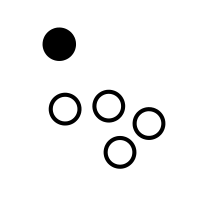

El método de Isolation Forest es una técnica de detección de anomalías que utiliza árboles de decisión aleatorios para identificar observaciones atípicas en un conjunto de datos.
En términos generales, la idea es que las observaciones anómalas son menos frecuentes y, por lo tanto, requieren menos pasos para ser aisladas del resto de las observaciones. Para cada árbol de decisión en el bosque, se selecciona aleatoriamente una característica y se establece un punto de división aleatorio entre el valor mínimo y máximo de la característica seleccionada. Este proceso de selección de características y divisiones se repite hasta que todas las observaciones estén aisladas en nodos terminales del árbol.
El número de divisiones que se necesitan para aislar una observación se utiliza como medida de anomalía. Las observaciones que requieren menos divisiones para ser aisladas se consideran más anómalas que las que requieren más divisiones. Para establecer un umbral de contaminación, se selecciona un valor de probabilidad que representa la proporción de observaciones anómalas que se espera que haya en el conjunto de datos.
En resumen, Isolation Forest es una técnica que utiliza árboles de decisión aleatorios para detectar observaciones atípicas en un conjunto de datos, utilizando el número de divisiones necesarias para aislar cada observación como medida de anomalía. El umbral de contaminación se establece para controlar la proporción de observaciones anómalas esperadas en el conjunto de datos.

**Con el algoritmo Isolation Forest, identificamos los valores atípicos del conjunto de datos estableciendo un umbral de contaminación del 5%**

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05) 
K =iso.fit_predict(clientes_limpio)
K

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


array([1, 1, 1, ..., 1, 1, 1])

**Creamos una columna con los valores de los outliers**

In [ ]:
clientes_limpio["outliers"] = K
clientes_limpio

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,outliers
0,20150128.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,20150228.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,20150328.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,20150428.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,20150528.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,20160528.0,1185013,3.0,36.0,1.0,53.0,20160514.0,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647305,20160528.0,1168909,3.0,36.0,1.0,43.0,20130823.0,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647306,20160528.0,1173729,3.0,36.0,0.0,33.0,20130909.0,1.0,1,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647307,20160528.0,1164094,3.0,36.0,0.0,54.0,20160513.0,0.0,32,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1


**Eliminamos las filas cuyo valor en la columna "outliers" es -1**

In [ ]:
clientes_limpio = clientes_limpio.loc[clientes_limpio["outliers"] != -1, :]
clientes_limpio

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,outliers
0,20150128.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,20150228.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,20150328.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,20150428.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,20150528.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,20160528.0,1185013,3.0,36.0,1.0,53.0,20160514.0,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647305,20160528.0,1168909,3.0,36.0,1.0,43.0,20130823.0,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647306,20160528.0,1173729,3.0,36.0,0.0,33.0,20130909.0,1.0,1,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647307,20160528.0,1164094,3.0,36.0,0.0,54.0,20160513.0,0.0,32,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1


**Eliminamos la columna "outliers" ya que fue creada solo para identificar los mismos y no tiene sentido que el modelo la contemple como una variable.**

In [ ]:
clientes_limpio = clientes_limpio.drop("outliers",1)   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
#conteo de nulos despues de limpieza y transformacion
clientes_limpio.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
ind_reca_fin_ult1        0
ind_tjcr_fin_ult1        0
i

In [ ]:
clientes_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833143 entries, 0 to 13647308
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             float64
 1   ncodpers               int64  
 2   ind_empleado           float64
 3   pais_residencia        float64
 4   sexo                   float64
 5   age                    float64
 6   fecha_alta             float64
 7   ind_nuevo              float64
 8   antiguedad             int64  
 9   indrel                 float64
 10  indrel_1mes            int64  
 11  tiprel_1mes            float64
 12  indresi                float64
 13  indext                 float64
 14  canal_entrada          float64
 15  indfall                float64
 16  nomprov                float64
 17  ind_actividad_cliente  float64
 18  renta                  float64
 19  segmento               float64
 20  ind_cco_fin_ult1       int64  
 21  ind_cder_fin_ult1      int64  
 22  ind_cno_fin_ult1

In [ ]:
#se exporta a csv el dataset limpio y transformado
clientes_limpio.to_csv('clientes_tratado.csv',header=True,index=False)

In [ ]:
clientes_tratado=pd.read_csv('clientes_tratado.csv', header=0)
clientes_tratado.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,20150128.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,20150228.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,20150328.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,20150428.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,20150528.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


> **4.5 CORRELACIÓN DE VARIABLES DEL DATASET LIMPIO Y TRANSFORMADO**

In [ ]:
X_columns = clientes_tratado.columns.to_list()[0:20]
print(X_columns)
Y_columns = clientes_tratado.columns.to_list()[20:]
print(Y_columns)

['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']
['ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


In [ ]:
import matplotlib.pylab as pylab
params = {'figure.figsize': (20, 10),
         'xtick.labelsize':10,
         'ytick.labelsize':10}
pylab.rcParams.update(params)

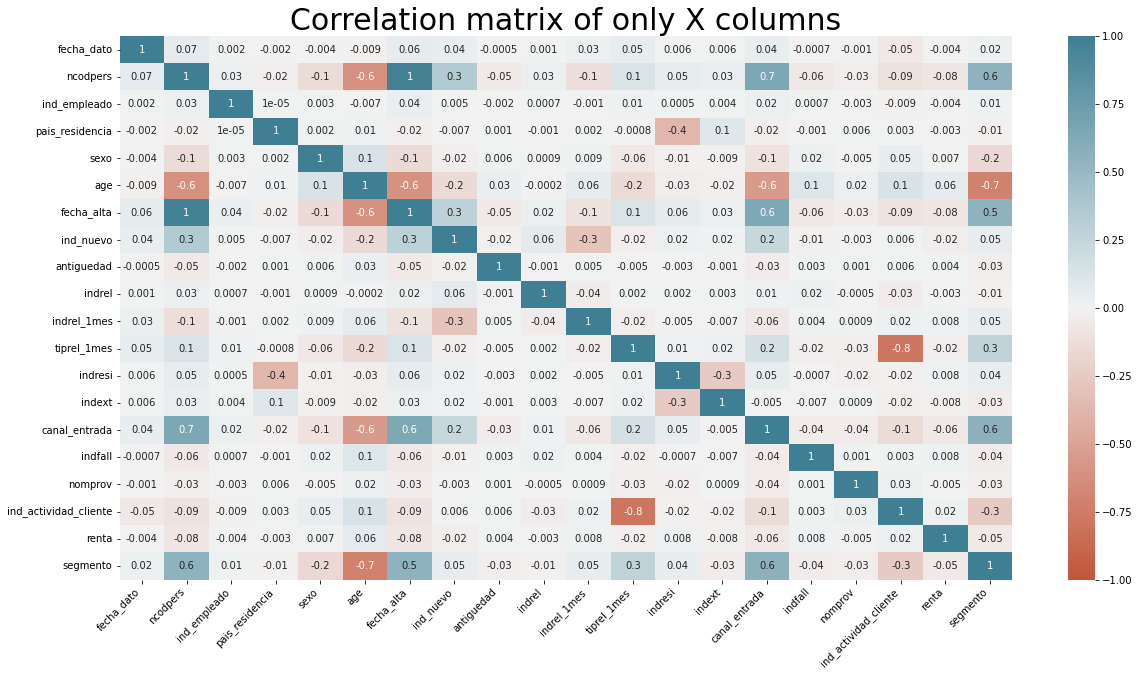

In [ ]:
# Heatmap for correlation matrix of only X columns. 
corr_matrix_X = clientes_tratado[X_columns].corr()
# sns.heatmap(corrMatrix, annot=True, )
ax = sns.heatmap(
    corr_matrix_X, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    fmt='.1g',
    annot=True,
    # mask=np.triu(corr_matrix_X),
    annot_kws={"size": 10}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Correlation matrix of only X columns", fontsize = 30)
plt.show()

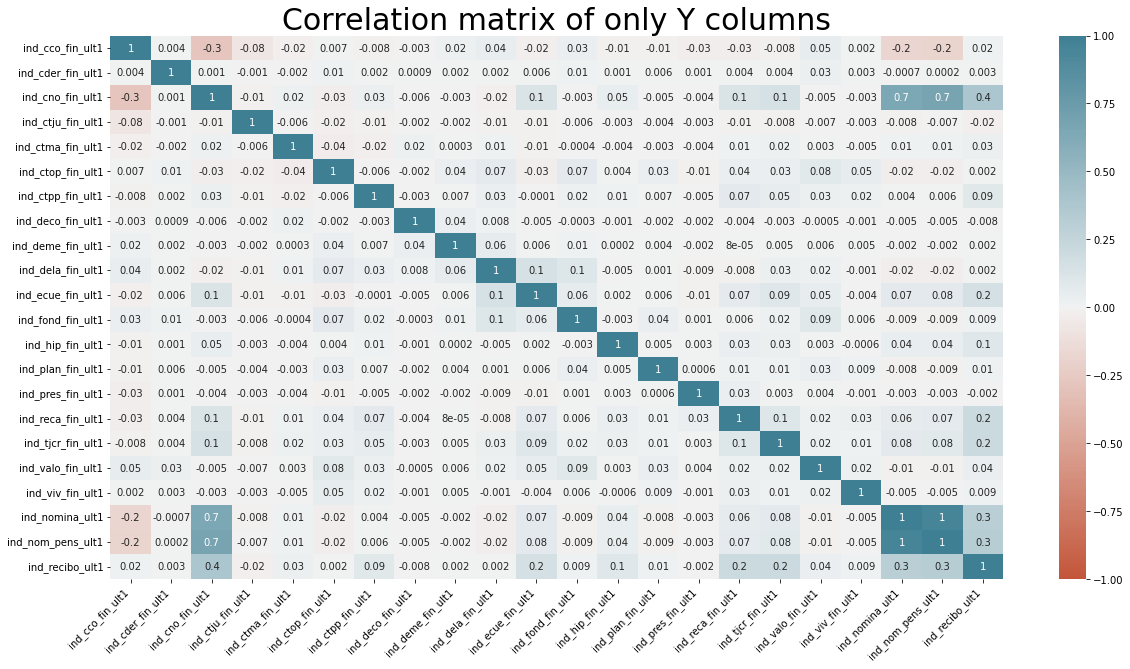

In [ ]:
# Heatmap for correlation matrix of only Y columns
corr_matrix_Y = clientes_tratado[Y_columns].corr()
# sns.heatmap(corrMatrix, annot=True, )
ax = sns.heatmap(
    corr_matrix_Y, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    fmt='.1g',
    # mask=np.triu(corr_matrix_Y),
    annot=True,
    annot_kws={"size": 10}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Correlation matrix of only Y columns", fontsize = 30)
plt.show()

**CALCULANDO LA MATRIZ DE CORRELACIÓN DE TODAS LAS COLUMNAS**

In [ ]:
#Se calculan a continuación los coeficientes de correlación para los pares de variables en el dataset
clientes_tratado.corr()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
fecha_dato,1.000000,0.069318,0.001709,-0.002020,-0.003736,-0.009142,0.056652,0.042151,-0.000465,0.001317,...,-0.008102,-0.009493,-0.005992,-0.012417,-0.023023,-0.014706,-0.007680,-0.019048,-0.020285,-0.022064
ncodpers,0.069318,1.000000,0.030762,-0.018080,-0.134941,-0.618083,0.974659,0.347283,-0.050317,0.027579,...,-0.061678,-0.080685,-0.035395,-0.120782,-0.108544,-0.124888,-0.067141,-0.006593,-0.011539,-0.047324
ind_empleado,0.001709,0.030762,1.000000,0.000011,0.002617,-0.006899,0.035716,0.004533,-0.001930,0.000693,...,-0.014546,-0.014820,-0.003224,-0.006739,-0.012851,-0.016202,-0.007412,0.000714,0.000845,-0.011062
pais_residencia,-0.002020,-0.018080,0.000011,1.000000,0.002443,0.010584,-0.018309,-0.006532,0.001055,-0.001262,...,-0.000430,-0.002185,-0.001854,-0.003003,-0.002567,0.003124,-0.000685,-0.003845,-0.003885,-0.005618
sexo,-0.003736,-0.134941,0.002617,0.002443,1.000000,0.125794,-0.148869,-0.023975,0.006389,0.000911,...,0.018606,0.001070,0.014223,0.044048,0.035736,0.039687,0.008235,0.005045,0.005123,0.037193
age,-0.009142,-0.618083,-0.006899,0.010584,0.125794,1.000000,-0.608096,-0.153041,0.031366,-0.000152,...,0.026202,0.048468,0.024514,0.064057,0.065191,0.088957,0.016073,-0.000812,0.015350,0.041313
fecha_alta,0.056652,0.974659,0.035716,-0.018309,-0.148869,-0.608096,1.000000,0.286262,-0.051857,0.024439,...,-0.063795,-0.074841,-0.035135,-0.120447,-0.101312,-0.125822,-0.071584,-0.002930,-0.007424,-0.044057
ind_nuevo,0.042151,0.347283,0.004533,-0.006532,-0.023975,-0.153041,0.286262,1.000000,-0.015531,0.062785,...,-0.012776,-0.015981,-0.012548,-0.042087,-0.035409,-0.029374,-0.014016,-0.028528,-0.029595,-0.036823
antiguedad,-0.000465,-0.050317,-0.001930,0.001055,0.006389,0.031366,-0.051857,-0.015531,1.000000,-0.001407,...,0.003594,0.003761,0.002003,0.006622,0.005951,0.007197,0.004027,-0.000140,0.000113,0.002706
indrel,0.001317,0.027579,0.000693,-0.001262,0.000911,-0.000152,0.024439,0.062785,-0.001407,1.000000,...,-0.001959,-0.002829,-0.001860,-0.002919,-0.005697,-0.004875,-0.002391,-0.005576,-0.005823,-0.009049


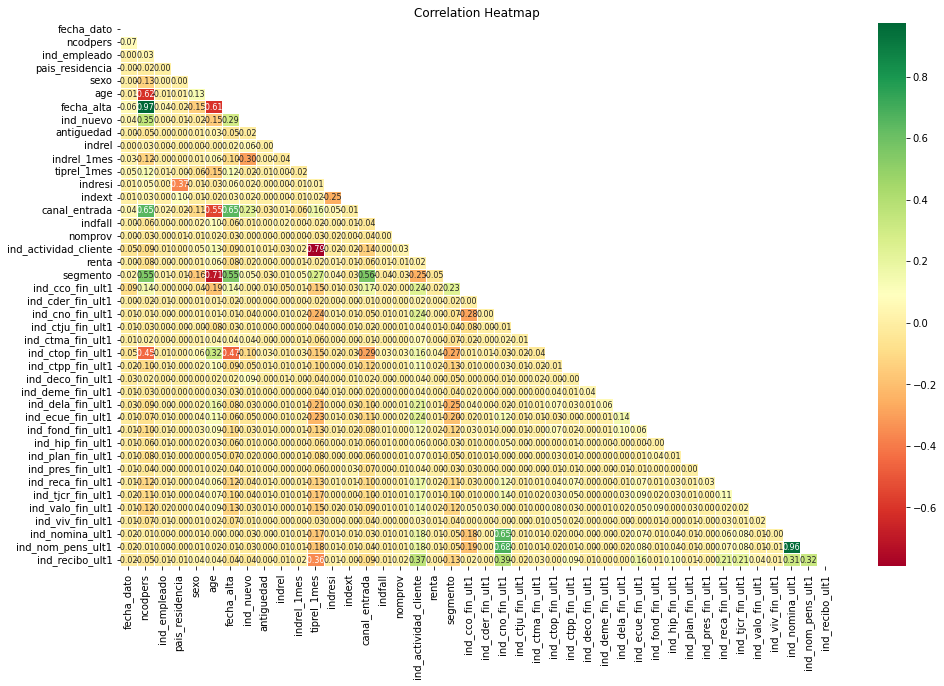

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(clientes_tratado.corr(),dtype = bool))
sns.heatmap(clientes_tratado.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'RdYlGn', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

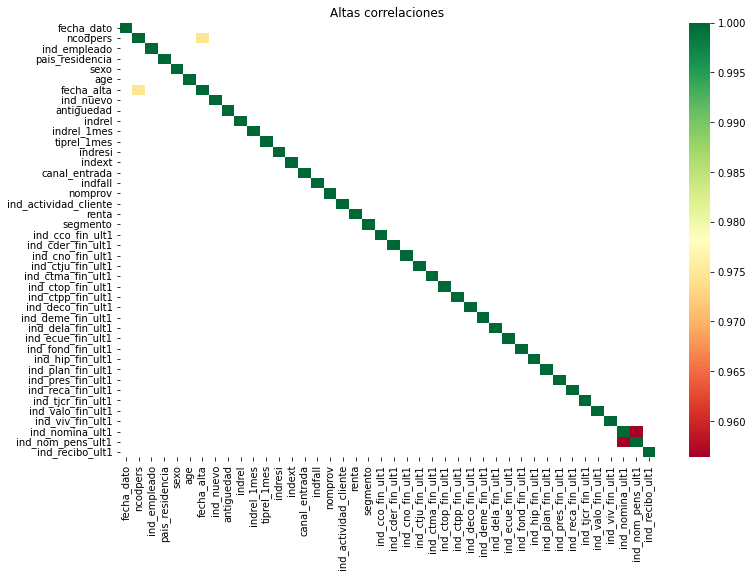

In [ ]:
matrix_correlation= clientes_tratado.corr()
#filtro de la matriz
high_corr=matrix_correlation[matrix_correlation>=.7]
plt.figure (figsize=(12,8))
mask = np.triu(np.ones_like(clientes_tratado.corr(),dtype = bool))
sns.heatmap(high_corr,cmap='RdYlGn')
plt.title('Altas correlaciones');

# Observación:
Los pares de variables que tienen las correlaciones positivas más significativas son:
* ncodpers - fecha_alta
* indresi - pais_residencia
* segmento - age
* ind_actividad_cliente - tiprel_1mes
* ind_nomina_ult1 - ind_cno_fin_ult1
* ind_nom_pens-ult1 - ind_cno_fin_ult1
* ind_nom_pens_ult1 - ind_nomina_ult1

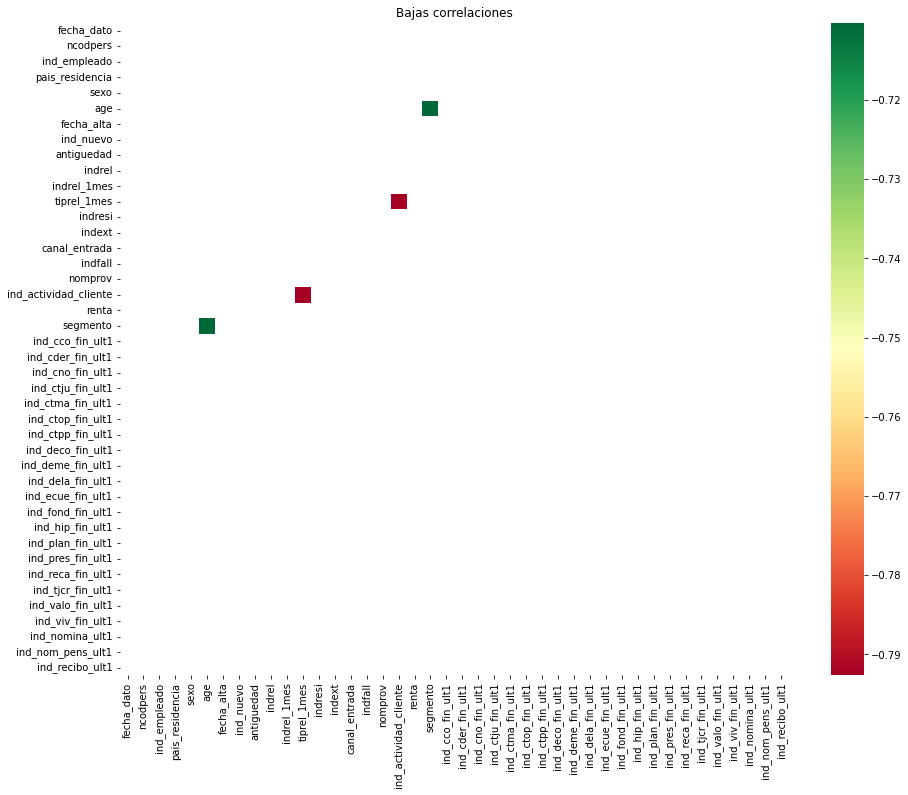

In [ ]:
#filtro de la matrix
low_corr=matrix_correlation[matrix_correlation<=-0.7]
plt.figure (figsize=(15,12))
sns.heatmap(low_corr,cmap='RdYlGn')
plt.title ('Bajas correlaciones');

# Observación: 
Se destaca que existen pocas correlaciones negativas significativas en estos gráficos.

<Figure size 432x288 with 0 Axes>

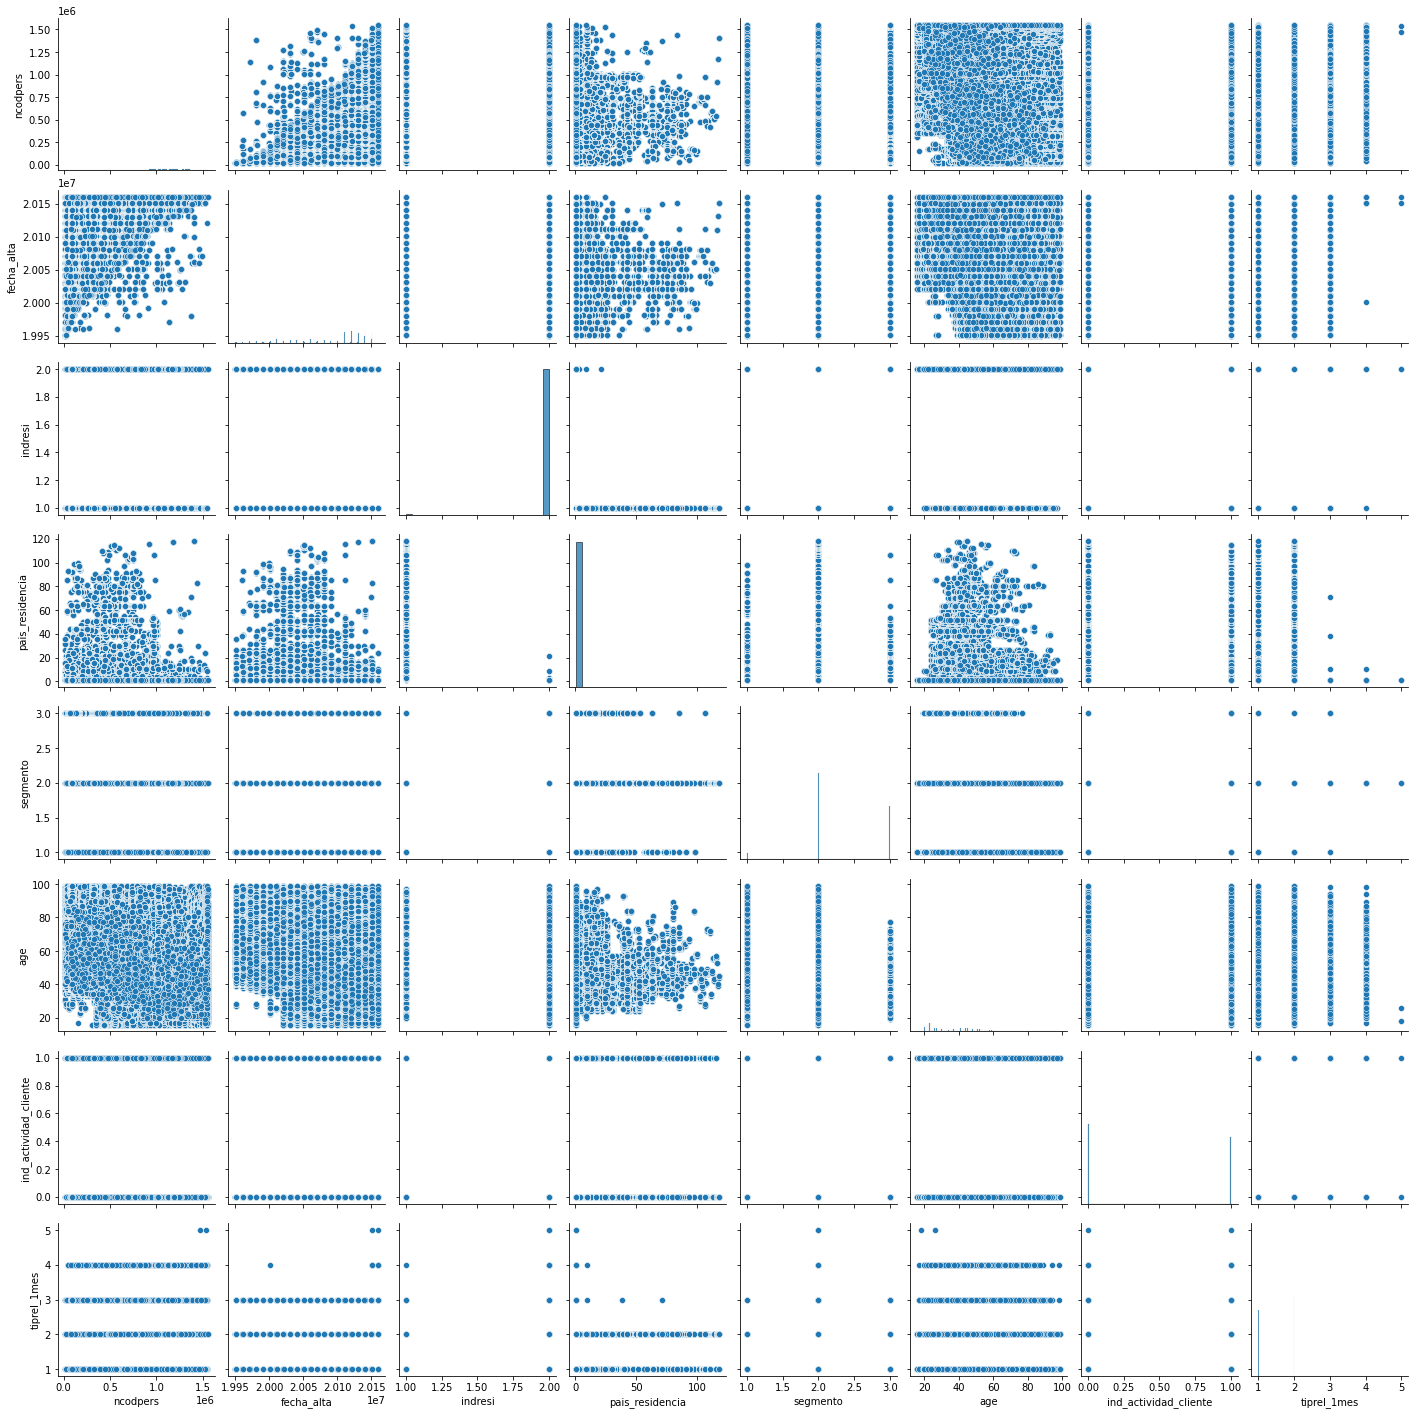

In [ ]:
plt.figure()
sns.pairplot(clientes_tratado[['ncodpers','fecha_alta','indresi','pais_residencia','segmento','age','ind_actividad_cliente','tiprel_1mes']] ,palette = 'plasma')
plt.show()